<h1 style="font-family: Arial, sans-serif; color: #ff0000; text-align: center; text-shadow: 2px 2px 4px #FF33CE;">Interacting with an API using Python</h1>

In [7]:
import os
import spotipy
from sqlalchemy import create_engine
import pandas as pd
from dotenv import load_dotenv

# load the .env file variables
load_dotenv()

# get the environment variables
SPOTIPY_CLIENT_ID = os.getenv("SPOTIPY_CLIENT_ID")
SPOTIPY_CLIENT_SECRET = os.getenv("SPOTIPY_CLIENT_SECRET")

In [21]:
from spotipy.oauth2 import SpotifyClientCredentials

robbie_uri = 'spotify:artist:2HcwFjNelS49kFbfvMxQYw'
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials()) # we can also add client_id and client_secret as parameters

# get the artist's top tracks, its duration and popularity and store it in a dataframe 
results = spotify.artist_top_tracks(robbie_uri)
tracks = results['tracks']
df = pd.DataFrame(tracks)
df = df[['name', 'duration_ms', 'popularity']]
df['duration_ms'] = df['duration_ms'] / 60000
df = df.rename(columns={'name': 'track_name', 'duration_ms': 'duration_min', 'popularity': 'popularity_score'})
df

,track_name,duration_min,popularity_score
0,Angels,4.416667,78
1,Feel,4.397767,77
2,Rock DJ,4.342667,58
3,Candy,3.350883,71
4,Somethin' Stupid,2.841550,71
5,She's The One,4.300433,71
6,Let Me Entertain You,4.366667,68
7,Supreme,4.339983,46
8,Better Man,3.410667,43
9,Love My Life,3.472000,62


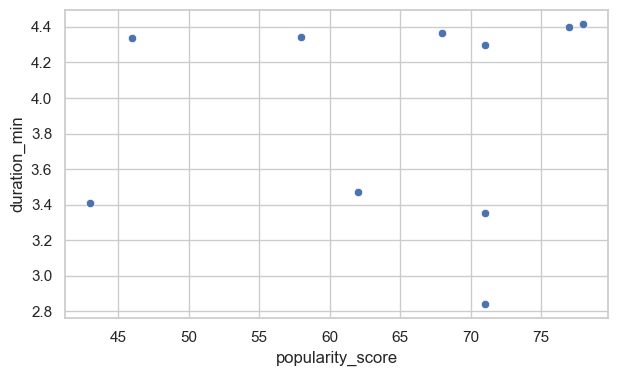

In [26]:
import seaborn as sns

# plot the popularity score and duration of the tracks i a scatter plot
sns.scatterplot(data=df, x='popularity_score', y='duration_min')
sns.set_theme(rc={'figure.figsize':(7, 4)})
sns.set_style("whitegrid") # to have a white grid on the background
sns.despine() # to remove the top and right spines